In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris_df = pd.read_csv("C:\\Users\\Jayprakash\\Downloads\\Cipherbyte\\IrisFlower.csv")
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- In the above description table, we can see that Id column could differ the results in model learning process.
- We will find the unique values and will determine how to classify the output.

In [5]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

- As there are more than 2 types of Species, we can use one-hot encoding or Label Encoder.
- Here, Binary classifier would not work as there are more than 2 classes.

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species'])
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


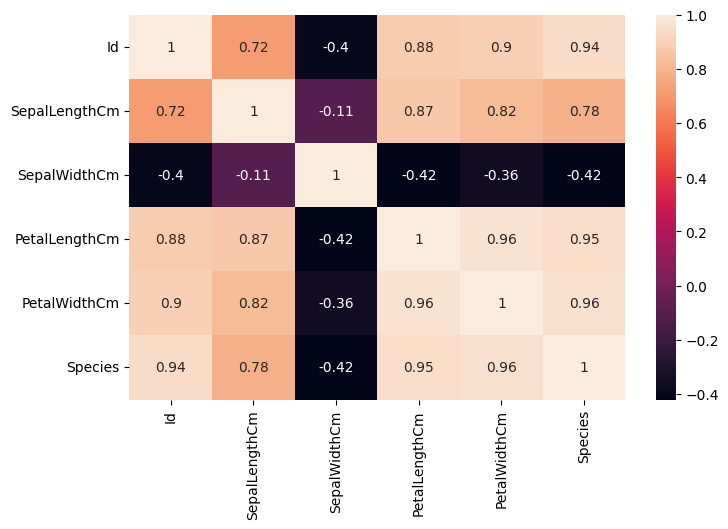

In [7]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(iris_df.corr(), annot=True)
plt.show()

- Removed Id column as it would affect the models and obtaining unnecessary relation between Id and other columns

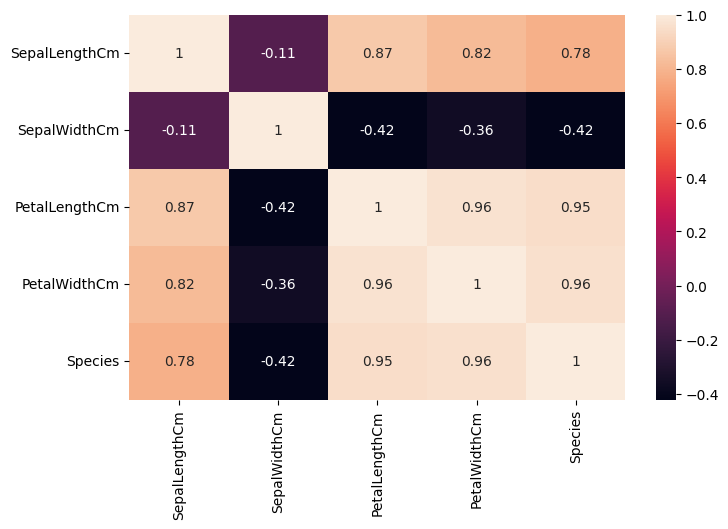

In [8]:
iris_df.drop(["Id"], axis = 1, inplace = True)

plt.figure(figsize=(8,5))
sns.heatmap(iris_df.corr(), annot=True)
plt.show()

- Here, we will differentiate aur input values and output values.

In [9]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

X = iris_df[iris_df.columns[:-1]].values
#print(X)
Y = iris_df[iris_df.columns[-1]].values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
ss = StandardScaler()
lb = LabelBinarizer()

X_df = ss.fit_transform(X)
target = lb.fit_transform(Y)

print(target)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

# 1. Sequential Model
- Sequential groups a linear stack of layers into a Model.
- Has two methods:

(1) add()
- Sequential.add(layer, rebuild=True)
- Adds a layer instance on top of the layer stack.- Arguments: layer, rebuild



 pop()

- Sequential.pop(rebuild=True)
- Removes the last layer in the model.- Arguments: rebuild

### Sklearn 
- train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

### Parameters:

- Arrays: Sequence of indexables (Lists, numpy arrays, scipy-sparse matrices, pandas dataframe)

- test_size: int or float, by default None 
  
- train_size: int or float, by default None.

- random_state: int, by default None.

- shuffle: boolean object, by default None .d as a list.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_df, target, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

model = keras.Sequential([Input(shape=(4,)), keras.layers.Dense(3, activation = 'softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 120, validation_data = (X_test, Y_test))

Epoch 1/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0635 - loss: 2.6482 - val_accuracy: 0.1778 - val_loss: 2.1057
Epoch 2/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0739 - loss: 2.6139 - val_accuracy: 0.1778 - val_loss: 2.0897
Epoch 3/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0874 - loss: 2.6339 - val_accuracy: 0.1778 - val_loss: 2.0741
Epoch 4/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0999 - loss: 2.5251 - val_accuracy: 0.1778 - val_loss: 2.0588
Epoch 5/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0853 - loss: 2.5674 - val_accuracy: 0.1778 - val_loss: 2.0432
Epoch 6/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0812 - loss: 2.4273 - val_accuracy: 0.1778 - val_loss: 2.0276
Epoch 7/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0756 - loss: 2.5224 - val_accuracy: 0.1778 - val_loss: 2.0120
Epoch 8/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0933 - loss: 2.5382 - val_accuracy: 0.1778 - val_loss:

In [13]:
model = Sequential()
model.add(Dense(12, input_dim = 4, activation='relu'))
model.add(Dense(units=15, activation = 'relu'))
model.add(Dense(units=8, activation = 'relu'))
model.add(Dense(units=10, activation = 'relu'))
model.add(Dense(units=3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_test, Y_test))

Epoch 1/100


C:\Users\Jayprakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2955 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0301
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4599 - loss: 1.1038 - val_accuracy: 0.4222 - val_loss: 1.0112
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4426 - loss: 1.0532 - val_accuracy: 0.4000 - val_loss: 0.9910
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3795 - loss: 1.0367 - val_accuracy: 0.4000 - val_loss: 0.9698
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3614 - loss: 1.0107 - val_accuracy: 0.3778 - val_loss: 0.9463
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3524 - loss: 0.9917 - val_accuracy: 0.4000 - val_loss: 0.9228
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4371 - loss: 0.9340 - val_accuracy: 0.4222 - val_loss: 0.8994
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3871 - loss: 0.9497 - val_accuracy: 0.4444 - val_loss: 0.8776
Epoc

# 2. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Y_train_1d = np.argmax(Y_train, axis=1)
Y_test_1d = np.argmax(Y_test, axis=1)

lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train_1d)

y_pred = lg_model.predict(X_test)

print(classification_report(Y_test_1d, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Cross Validation of Logistic Regression

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split

scores = cross_val_score(lg_model, X_df, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean cross-validation score: 0.9600000000000002


In [16]:
from sklearn.metrics import accuracy_score
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y, test_size=0.3, random_state=i)
    lg_model.fit(X_train, Y_train)
    y_pred = lg_model.predict(X_test)
    print(f"Split {i} Accuracy:", accuracy_score(Y_test, y_pred))

Split 0 Accuracy: 0.9777777777777777
Split 1 Accuracy: 0.9555555555555556
Split 2 Accuracy: 0.9777777777777777
Split 3 Accuracy: 0.9777777777777777
Split 4 Accuracy: 0.9555555555555556


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Using cross-validation for Logistic Regression
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X_df, Y, cv=5)
print("Logistic Regression Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Using cross-validation for Decision Tree
dt_model = DecisionTreeClassifier()
scores = cross_val_score(dt_model, X_df, Y, cv=5)
print("Decision Tree Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Logistic Regression Cross-validation scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean cross-validation score: 0.9600000000000002
Decision Tree Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean cross-validation score: 0.9533333333333334


In [18]:
lg_model = LogisticRegression(C=0.1)  # C is the inverse of regularization strength
lg_model.fit(X_train, Y_train)
y_pred = lg_model.predict(X_test)
print("Logistic Regression with Regularization:", accuracy_score(Y_test, y_pred))

Logistic Regression with Regularization: 0.9555555555555556


# 3. K-Nearest Neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(iris_df[["SepalLengthCm","SepalWidthCm"]], target, 
                                                    test_size = 0.3, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.75      0.50      0.60        18
           2       0.50      0.73      0.59        11

   micro avg       0.75      0.73      0.74        45
   macro avg       0.75      0.74      0.73        45
weighted avg       0.78      0.73      0.74        45
 samples avg       0.73      0.73      0.73        45



C:\Users\Jayprakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.pipeline import Pipeline

X = iris_df[["SepalLengthCm","SepalWidthCm"]]
Y = iris_df[iris_df.columns[-1]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)

knn_ppl = Pipeline(steps=[("scaler", StandardScaler()), 
                      ("knn", KNeighborsClassifier(n_neighbors=3, weights='uniform'))])

knn_ppl.fit(X_train, Y_train)

y_pred = knn_ppl.predict(X_test)
print("K Nearest Neighbour:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

K Nearest Neighbour: 0.7631578947368421
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.70      0.54      0.61        13
           2       0.60      0.75      0.67        12

    accuracy                           0.76        38
   macro avg       0.77      0.76      0.76        38
weighted avg       0.77      0.76      0.76        38



In [21]:
from sklearn.inspection import DecisionBoundaryDisplay

label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

if np.issubdtype(Y.dtype, np.number):
    Y_numeric = Y
else:
    Y_numeric = np.array([label_map[label] for label in Y])

In [22]:
# Mesh for plotting decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

C:\Users\Jayprakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


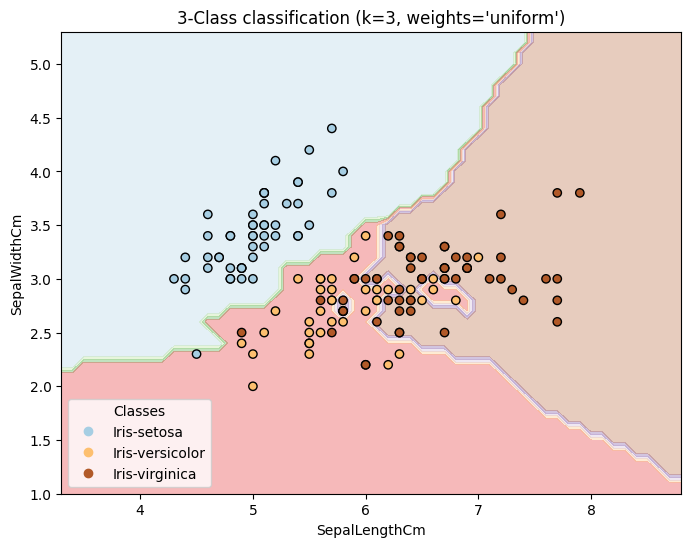

In [23]:
# Decision boundaries for classification
plt.figure(figsize=(8, 6))
Z = knn_ppl.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y_numeric, edgecolors="k", cmap=plt.cm.Paired)
handles, labels = scatter.legend_elements()

plt.legend(handles, label_map.keys(), loc="lower left", title="Classes")
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title(f"3-Class classification (k={knn_ppl[-1].n_neighbors}, weights='uniform')")
plt.show()